In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [2]:
# Load the dataset from a spreadsheet (e.g., Excel file)
data = pd.read_excel('Insurance_dataset.xlsx')

In [3]:
print(data.head(60))

    Year Company  Liquidity_risk  Return_on_asset  Return_on_equity
0   1998     Nem        0.587190         0.254140          0.219220
1   1998    Aaic        0.244250         0.438440          0.981825
2   1998   Aiico        0.394700         0.366935          0.347857
3   1998   Staco        0.088225         0.478325          0.596320
4   1999     Nem        0.549070         0.177405          0.022668
5   1999    Aaic        0.255450         0.045335          0.956650
6   1999   Aiico        0.384400         0.451540          0.349035
7   1999   Staco        0.222845         0.319125          0.542675
8   2000     Nem        0.568160         0.088225          0.135400
9   2000    Aaic        0.237200         0.270838          0.638250
10  2000   Aiico        0.455530         0.589470          0.349340
11  2000   Staco        0.461185         0.480612          0.500560
12  2001     Nem        0.597330         0.222842          0.125140
13  2001    Aaic        0.344670         0.25028

In [4]:
# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)


Year                0
Company             0
Liquidity_risk      0
Return_on_asset     0
Return_on_equity    0
dtype: int64
Year                  int64
Company              object
Liquidity_risk      float64
Return_on_asset     float64
Return_on_equity    float64
dtype: object


In [5]:
# Descriptive statistics
print("Descriptive Statistics:")
print(data.describe())

# Correlation matrix
correlation_matrix = data[['Liquidity_risk', 'Return_on_asset', 'Return_on_equity']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Descriptive Statistics:
              Year  Liquidity_risk  Return_on_asset  Return_on_equity
count   100.000000      100.000000       100.000000        100.000000
mean   2019.020000      766.514386         0.327846          0.244075
std      90.691616     7658.836942         0.207668          0.207401
min    1998.000000        0.078940         0.045335          0.022668
25%    2004.000000        0.375698         0.192247          0.106648
50%    2010.000000        0.504420         0.248356          0.167401
75%    2016.250000        0.882058         0.448255          0.310584
max    2914.000000    76589.000000         0.981824          0.981825

Correlation Matrix:
                  Liquidity_risk  Return_on_asset  Return_on_equity
Liquidity_risk          1.000000        -0.004191         -0.058875
Return_on_asset        -0.004191         1.000000         -0.077460
Return_on_equity       -0.058875        -0.077460          1.000000


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


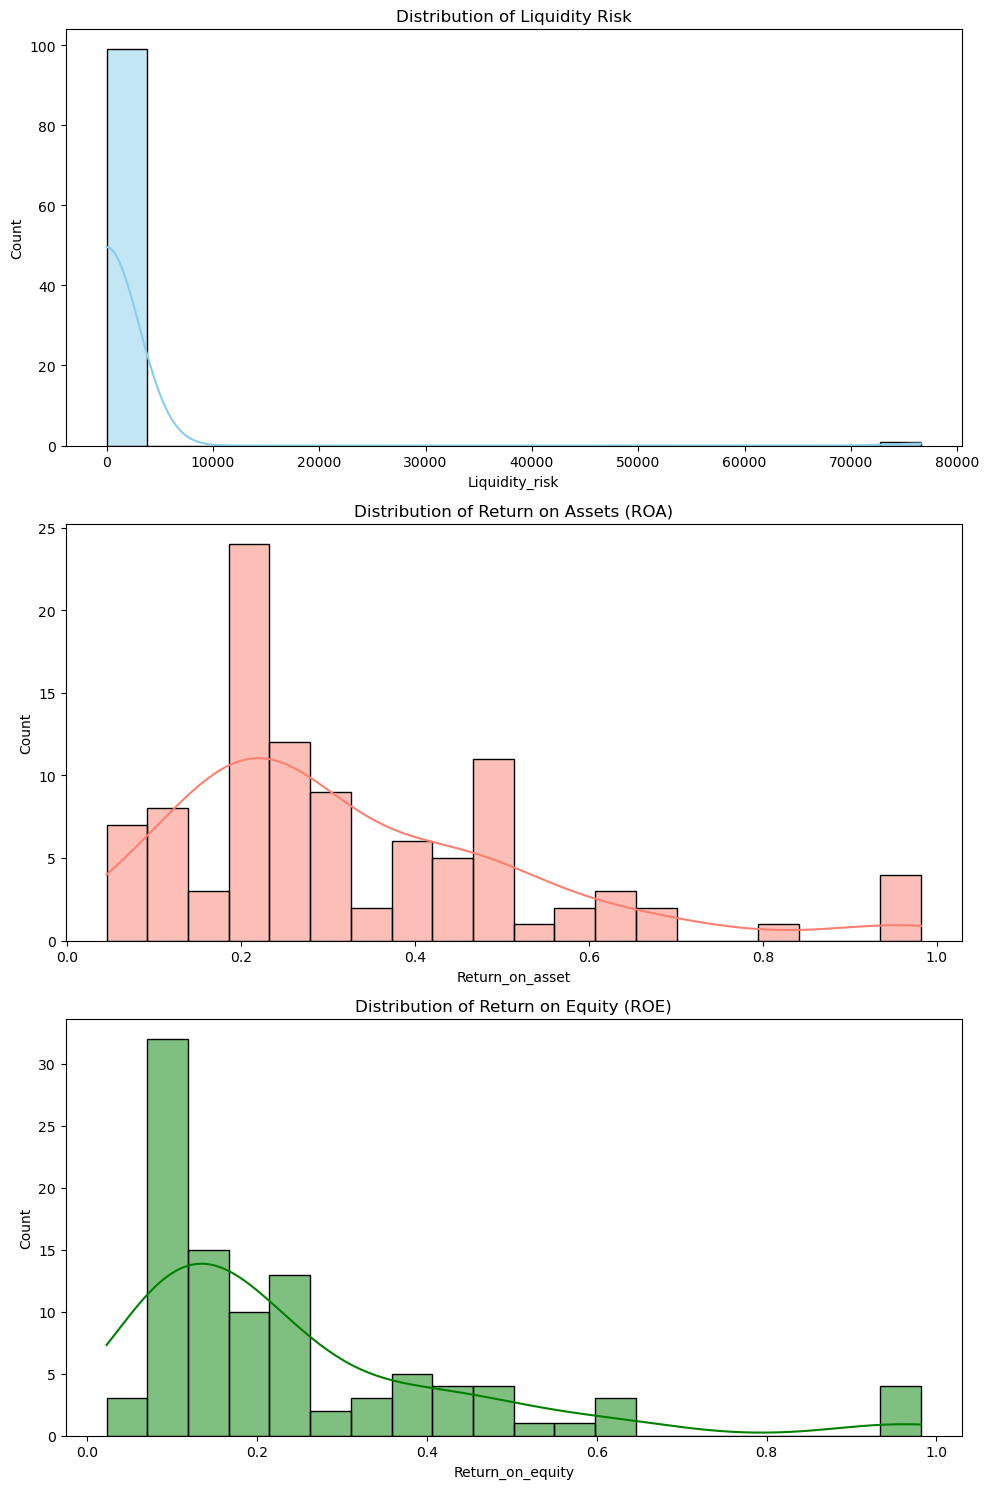

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot histograms for Liquidity Risk, Return on Assets, and Return on Equity
sns.histplot(data['Liquidity_risk'], kde=True, ax=axes[0], color='skyblue', bins=20)
axes[0].set_title('Distribution of Liquidity Risk')

sns.histplot(data['Return_on_asset'], kde=True, ax=axes[1], color='salmon', bins=20)
axes[1].set_title('Distribution of Return on Assets (ROA)')

sns.histplot(data['Return_on_equity'], kde=True, ax=axes[2], color='green', bins=20)
axes[2].set_title('Distribution of Return on Equity (ROE)')

# Adjust layout
plt.tight_layout()
plt.show()


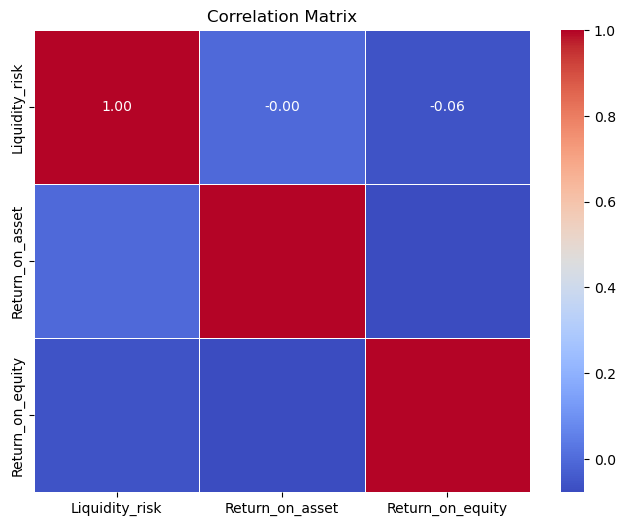

In [7]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Display comparison results
insurance_mean_liquidity_risk = data['Liquidity_risk'].mean()
print("Mean Liquidity Risk - Insurance Companies:", insurance_mean_liquidity_risk)

Mean Liquidity Risk - Insurance Companies: 766.5143857549999


In [9]:
# Step 5: Inferential Analysis (Extended)
# Hypothesis testing
# Example of t-test for the relationship between liquidity risk and ROA
t_statistic_roa, p_value_roa = stats.ttest_ind(data['Return_on_asset'], data['Liquidity_risk'])

# Example of t-test for the relationship between liquidity risk and ROE
t_statistic_roe, p_value_roe = stats.ttest_ind(data['Return_on_equity'], data['Liquidity_risk'])

# Example of ANOVA to compare means of ROA across different insurance companies
anova_roa = stats.f_oneway(data[data['Company'] == 'Nem']['Return_on_asset'],
                            data[data['Company'] == 'Aaic']['Return_on_asset'],
                            data[data['Company'] == 'Aiico']['Return_on_asset'],
                            data[data['Company'] == 'Staco']['Return_on_asset'])

# Example of ANOVA to compare means of ROE across different insurance companies
anova_roe = stats.f_oneway(data[data['Company'] == 'Nem']['Return_on_equity'],
                            data[data['Company'] == 'Aaic']['Return_on_equity'],
                            data[data['Company'] == 'Aiico']['Return_on_equity'],
                            data[data['Company'] == 'Staco']['Return_on_equity'])

# Step 6: Interpretation (Extended)
# Interpret the results from the extended inferential analyses
print("\nT-test results for relationship between ROA and Liquidity Risk:")
print("T-statistic:", t_statistic_roa)
print("P-value:", p_value_roa)

print("\nT-test results for relationship between ROE and Liquidity Risk:")
print("T-statistic:", t_statistic_roe)
print("P-value:", p_value_roe)

print("\nANOVA results for comparing means of ROA across insurance companies:")
print("F-statistic:", anova_roa.statistic)
print("P-value:", anova_roa.pvalue)

print("\nANOVA results for comparing means of ROE across insurance companies:")
print("F-statistic:", anova_roe.statistic)
print("P-value:", anova_roe.pvalue)



T-test results for relationship between ROA and Liquidity Risk:
T-statistic: -1.0003954197192135
P-value: 0.31834019787214307

T-test results for relationship between ROE and Liquidity Risk:
T-statistic: -1.000504797304972
P-value: 0.3182874226766863

ANOVA results for comparing means of ROA across insurance companies:
F-statistic: 8.033593532822294
P-value: 7.855991524141353e-05

ANOVA results for comparing means of ROE across insurance companies:
F-statistic: 8.244224225749491
P-value: 6.164323131406018e-05


In [10]:
from scipy.stats import ttest_ind

# T-test for relationship between liquidity risk and ROA for each insurance company
t_statistic_roa = {}
p_value_roa = {}
for company in ['Nem', 'Aaic', 'Aiico', 'Staco']:
    t_statistic, p_value = ttest_ind(data[data['Company'] == company]['Return_on_asset'],
                                     data[data['Company'] == company]['Liquidity_risk'])
    t_statistic_roa[company] = t_statistic
    p_value_roa[company] = p_value

# T-test for relationship between liquidity risk and ROE for each insurance company
t_statistic_roe = {}
p_value_roe = {}
for company in ['Nem', 'Aaic', 'Aiico', 'Staco']:
    t_statistic, p_value = ttest_ind(data[data['Company'] == company]['Return_on_equity'],
                                     data[data['Company'] == company]['Liquidity_risk'])
    t_statistic_roe[company] = t_statistic
    p_value_roe[company] = p_value

print("T-test results for relationship between ROA and Liquidity Risk:")
for company in t_statistic_roa:
    print(f"Company: {company}, T-statistic: {t_statistic_roa[company]}, P-value: {p_value_roa[company]}")

print("\nT-test results for relationship between ROE and Liquidity Risk:")
for company in t_statistic_roe:
    print(f"Company: {company}, T-statistic: {t_statistic_roe[company]}, P-value: {p_value_roe[company]}")


T-test results for relationship between ROA and Liquidity Risk:
Company: Nem, T-statistic: -6.102827597517475, P-value: 1.7461458410439885e-07
Company: Aaic, T-statistic: -3.7812111015878513, P-value: 0.0004321544751090543
Company: Aiico, T-statistic: -1.0000943583238613, P-value: 0.3222800283113607
Company: Staco, T-statistic: -3.12146702281723, P-value: 0.0030448122211300674

T-test results for relationship between ROE and Liquidity Risk:
Company: Nem, T-statistic: -13.687461692440575, P-value: 3.4291695589576268e-18
Company: Aaic, T-statistic: -1.1785829672687935, P-value: 0.2443739553893083
Company: Aiico, T-statistic: -1.0001726105728792, P-value: 0.3222425548782477
Company: Staco, T-statistic: -2.168545144509383, P-value: 0.03510360580509863


In [11]:
import statsmodels.api as sm

# Define the independent variable (liquidity risk) and dependent variables (ROA and ROE)
X = data['Liquidity_risk']
Y_roa = data['Return_on_asset']
Y_roe = data['Return_on_equity']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Perform ordinary least squares (OLS) regression for ROA
model_roa = sm.OLS(Y_roa, X).fit()
print(model_roa.summary())

# Perform ordinary least squares (OLS) regression for ROE
model_roe = sm.OLS(Y_roe, X).fit()
print(model_roe.summary())


                            OLS Regression Results                            
Dep. Variable:        Return_on_asset   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.001722
Date:                Sun, 23 Jun 2024   Prob (F-statistic):              0.967
Time:                        12:49:11   Log-Likelihood:                 15.791
No. Observations:                 100   AIC:                            -27.58
Df Residuals:                      98   BIC:                            -22.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3279      0.021     15.

In [12]:
import pandas as pd
import scipy.stats as stats

# Calculate correlation coefficient and p-value
correlation_roa, p_value_roa = stats.pearsonr(data['Liquidity_risk'], data['Return_on_asset'])

# Print results
print("Correlation coefficient between Liquidity Risk and ROA:", correlation_roa)
print("P-value:", p_value_roa)

# Determine significance based on p-value
if p_value_roa < 0.05:
    print("The relationship between Liquidity Risk and ROA is statistically significant.")
else:
    print("There is no significant relationship between Liquidity Risk and ROA.")


# Calculate correlation coefficient and p-value
correlation_roe, p_value_roe = stats.pearsonr(data['Liquidity_risk'], data['Return_on_equity'])

# Print results
print("\nCorrelation coefficient between Liquidity Risk and ROE:", correlation_roe)
print("P-value:", p_value_roe)

# Determine significance based on p-value
if p_value_roe < 0.05:
    print("The relationship between Liquidity Risk and ROE is statistically significant.")
else:
    print("There is no significant relationship between Liquidity Risk and ROE.")


Correlation coefficient between Liquidity Risk and ROA: -0.004191320637118558
P-value: 0.9669878314282331
There is no significant relationship between Liquidity Risk and ROA.

Correlation coefficient between Liquidity Risk and ROE: -0.05887495592024851
P-value: 0.5606659793798782
There is no significant relationship between Liquidity Risk and ROE.


In [13]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>